In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv(r'/Users/aniketyadav/Documents/DS/CSN/googleplaystore_v2.csv')

In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data = data[-data['Rating'].isnull()]


In [8]:
data[data['Content Rating'].isnull()]
data = data.drop(index=10472)

In [9]:
data[data['Android Ver'].isnull()]
data['Android Ver'].fillna('4.1 and up', inplace=True)

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_71694/949344353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Android Ver'].fillna('4.1 and up', inplace=True)


In [10]:
data[data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [11]:
data['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [12]:
data['Current Ver'] = data['Current Ver'].fillna('Varies with device')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [14]:
data['Reviews'] = data.Reviews.astype('Int32')
data['Reviews'].describe()

count            9366.0
mean      514049.836536
std      3144042.127009
min                 1.0
25%              186.25
50%              5930.5
75%            81532.75
max          78158306.0
Name: Reviews, dtype: Float64

In [15]:
data['Price'] = data['Price'].str.replace('$','').astype('float64')

In [16]:
data.Price.describe()

count    9366.000000
mean        0.960928
std        15.816585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [17]:
data['Installs'] = data['Installs'].str.replace(',','')
data['Installs'] = data['Installs'].str.replace('+','').astype('float64')

In [18]:
np.percentile(data['Installs'], 50)

np.float64(500000.0)

In [19]:
print(data[data['Reviews']>data['Installs']])

                                 App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000       1.0  Free   0.00       Everyone    Medical   
4663   21516.529524   10000.0  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000       1.0  Paid   1.49       Everyone     Arcade   
6700   19000.000000       5.0  Free   0.00       Everyone     Arcade   
7402    6100.000000      10.0  Free   0.00       Everyone     Arcade   
8591    4200.000000    

In [20]:
data = data[-(data['Reviews']>data['Installs'])]

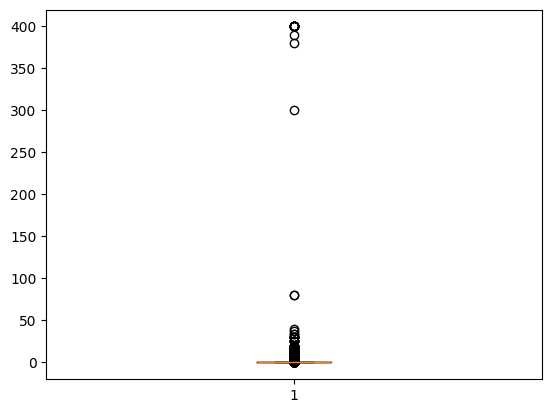

In [21]:
plt.boxplot(data['Price'])
plt.show()

In [22]:
data = data[data.Price<200]

In [23]:
data.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

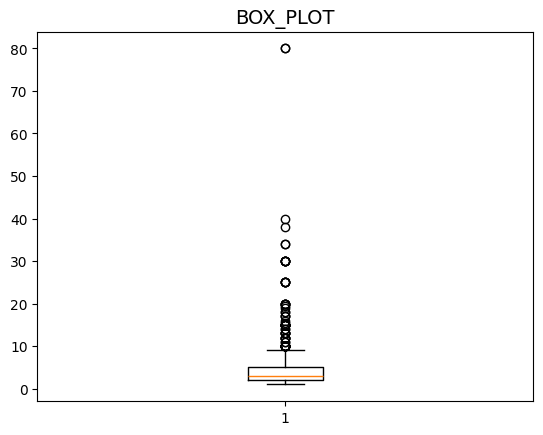

In [24]:

plt.boxplot(data[data['Price']>0]['Price'])
plt.title('BOX_PLOT', fontdict={'fontsize':14})
plt.show()

In [25]:
data = data[data['Reviews']<=1000000]

In [26]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


(array([6153.,  657.,  364.,  214.,  173.,  134.,  116.,   98.,  100.,
          62.,   74.,   33.,   51.,   30.,   46.,   50.,   33.,   31.,
          22.,   28.,   19.,   21.,   17.,   11.,   24.,   19.,   12.,
          18.,   17.,   13.]),
 array([1.000000e+00, 3.316770e+04, 6.633440e+04, 9.950110e+04,
        1.326678e+05, 1.658345e+05, 1.990012e+05, 2.321679e+05,
        2.653346e+05, 2.985013e+05, 3.316680e+05, 3.648347e+05,
        3.980014e+05, 4.311681e+05, 4.643348e+05, 4.975015e+05,
        5.306682e+05, 5.638349e+05, 5.970016e+05, 6.301683e+05,
        6.633350e+05, 6.965017e+05, 7.296684e+05, 7.628351e+05,
        7.960018e+05, 8.291685e+05, 8.623352e+05, 8.955019e+05,
        9.286686e+05, 9.618353e+05, 9.950020e+05]),
 <BarContainer object of 30 artists>)

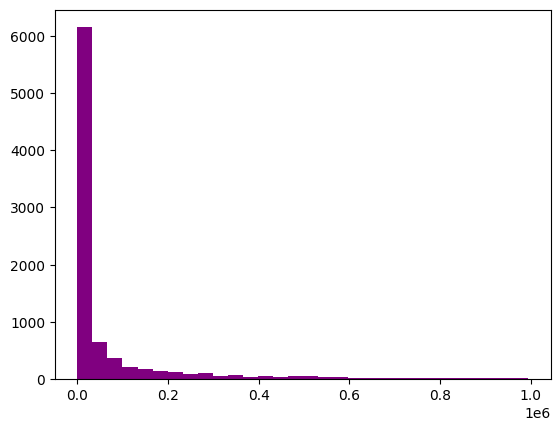

In [27]:
plt.hist(data['Reviews'], bins = 30, color='purple')

In [28]:
np.percentile(data['Installs'], 75)

np.float64(1000000.0)

In [29]:
data = data[data['Installs'] <= 100000000]

In [30]:
data.shape

(8630, 13)

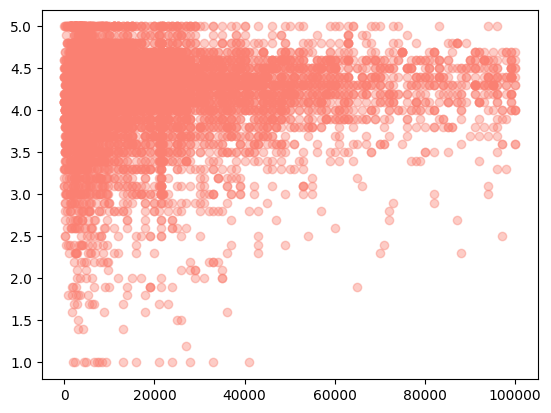

In [45]:
plt.scatter(data['Size'],data['Rating'], marker='o', color='salmon', alpha=0.4)

In [32]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [33]:
data = data[-data['Content Rating'].isin(['Adults only 18+', 'Unrated'])]

In [34]:
data.reset_index(inplace=True, drop=True)

In [35]:
data.shape

(8626, 13)

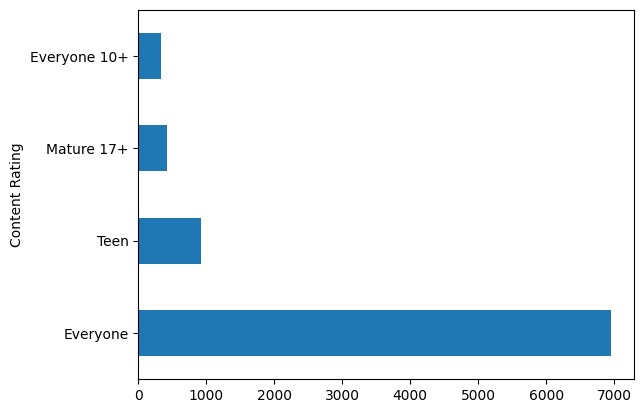

In [50]:
data['Content Rating'].value_counts().plot.barh()
plt.show()

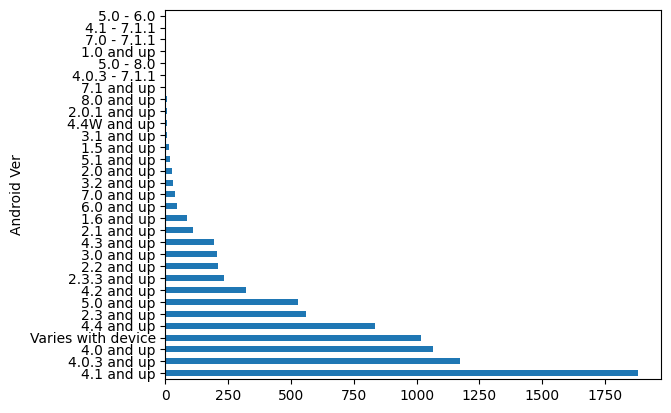

In [37]:
data['Android Ver'].value_counts().plot.barh()
plt.show()

In [52]:
import seaborn as sns

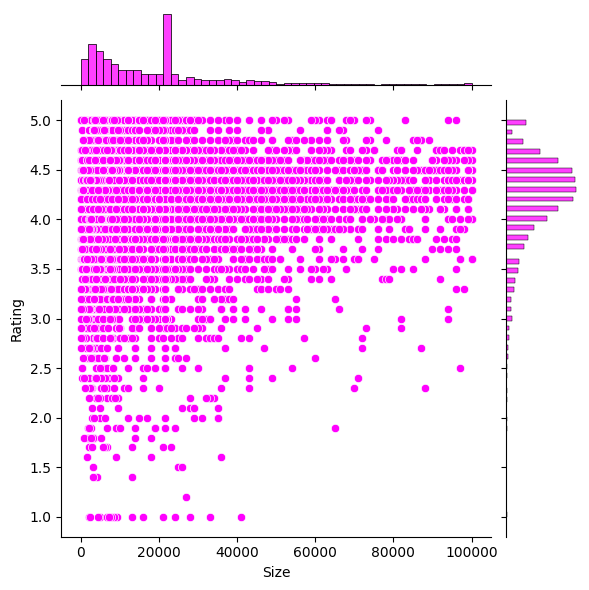

In [65]:
import scipy.stats as ss
r_value = round(ss.pearsonr(data['Size'], data['Rating'])[0], 3)
p_value = round(ss.pearsonr(data['Size'], data['Rating'])[1], 9)

str1 = f'Pearson r = {r_value}'
str2 = f'p-value = {p_value}'

sns.jointplot(x='Size', y='Rating', data=data, color='magenta')


plt.show()

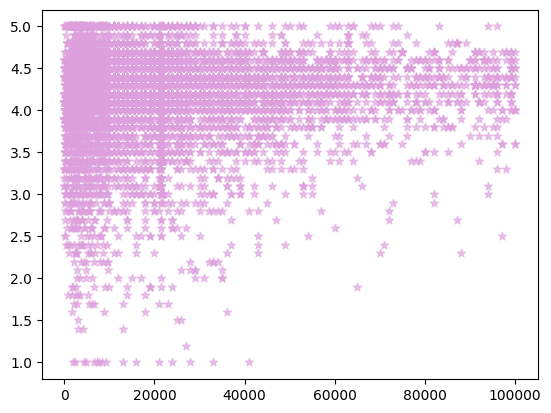

In [59]:
plt.scatter(data['Size'],data['Rating'], marker='*', color='plum', alpha=0.6)

In [181]:
import seaborn as sns

Text(0.5, 36.72222222222221, 'Size')

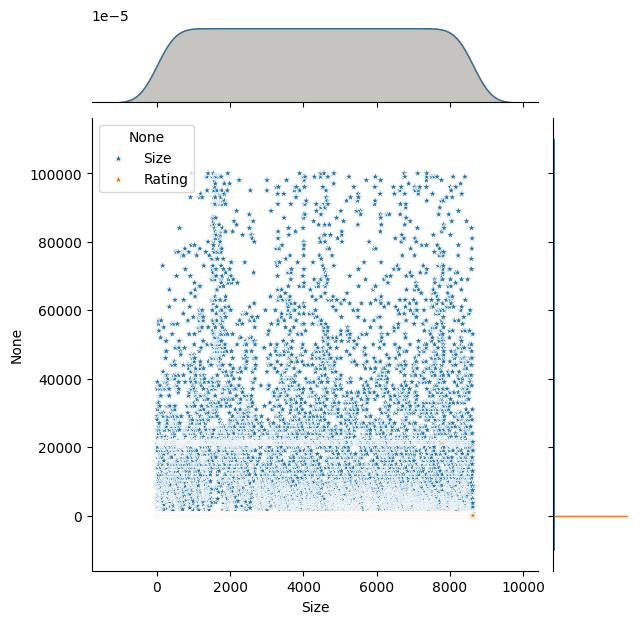

In [200]:
sns.jointplot((data['Size'],data['Rating']), kind= 'scatter', marker='*' )
plt.xlabel('Size')

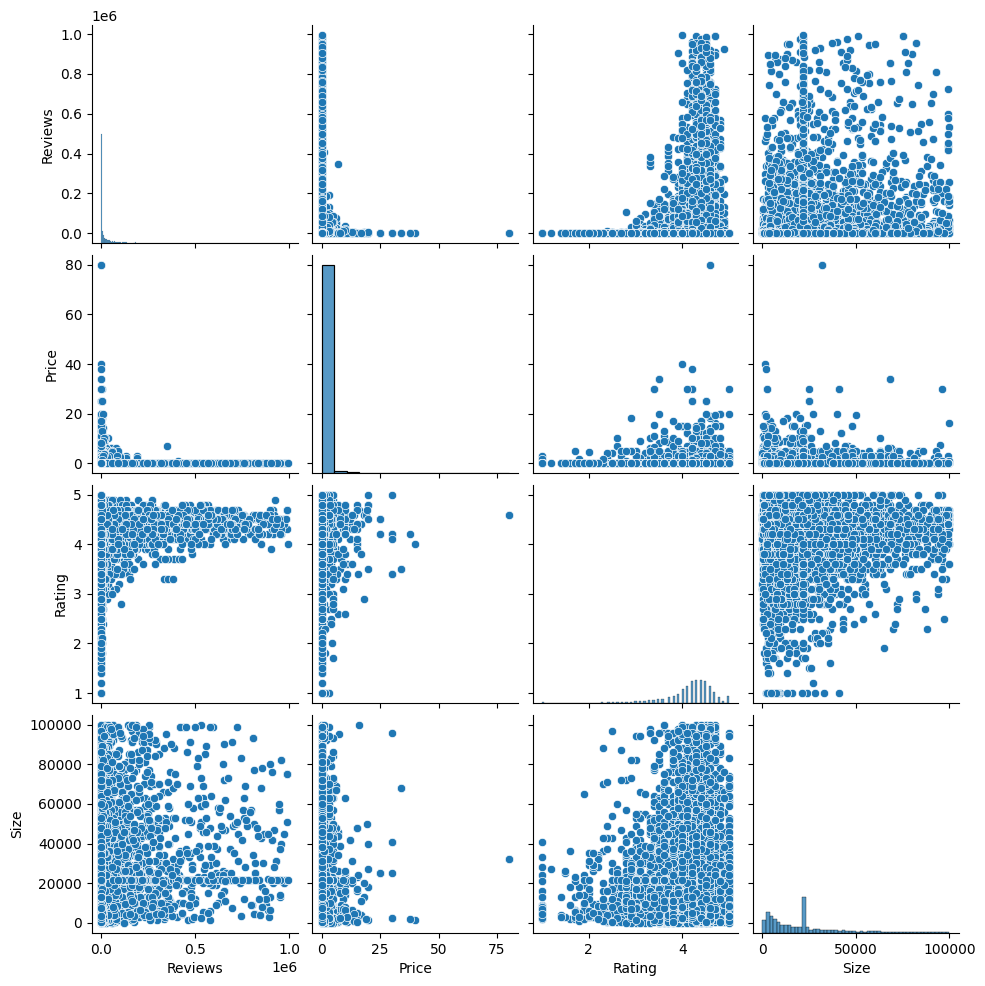

In [71]:
sns.pairplot(data[['Reviews', 'Price','Rating','Size']])
plt.show()

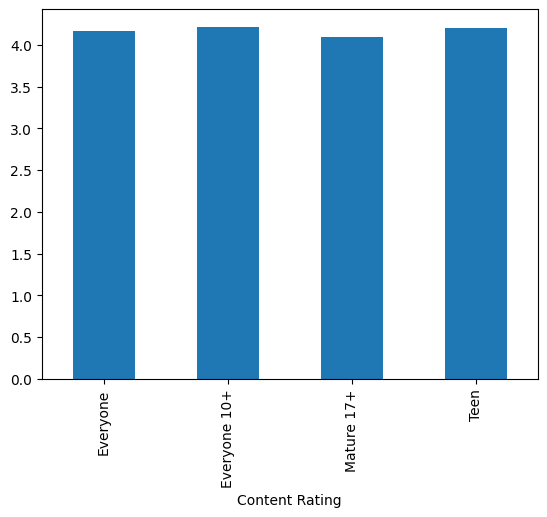

In [73]:
data.groupby(['Content Rating'])['Rating'].mean().plot.bar()
plt.show()

<Axes: xlabel='Content Rating', ylabel='Rating'>

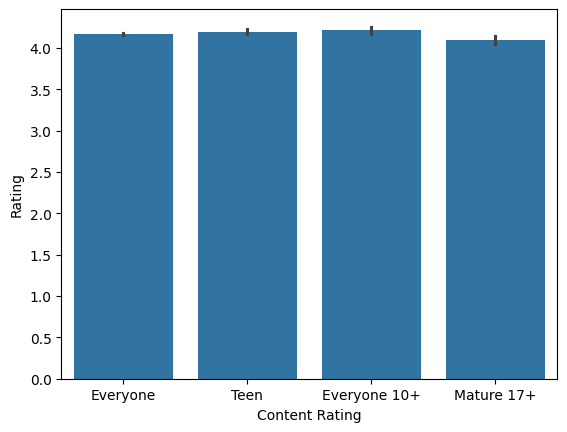

In [210]:
sns.barplot(x=data['Content Rating'],y= data['Rating'])

<Axes: xlabel='Content Rating', ylabel='Rating'>

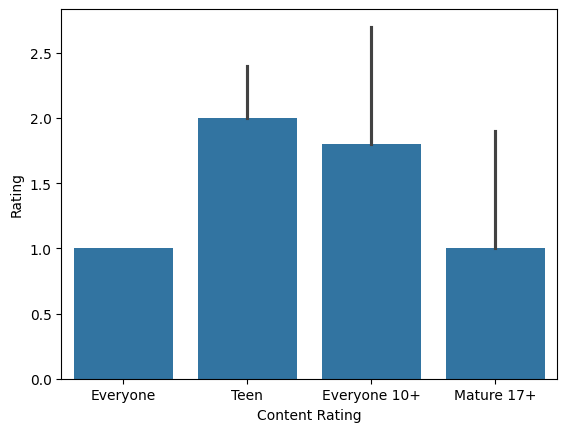

In [216]:
sns.barplot(x=data['Content Rating'], y=data['Rating'], estimator=lambda x: np.min(x))

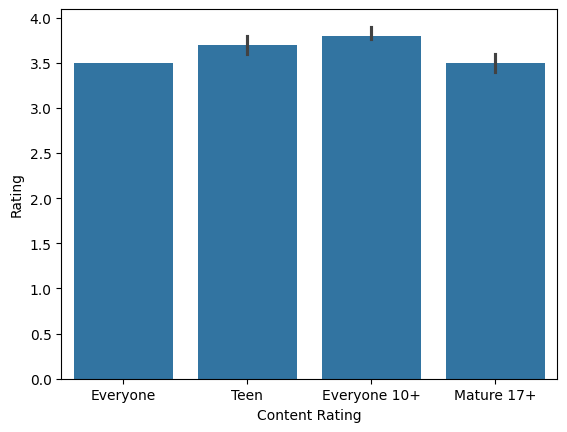

In [213]:
def percentile_10(values):
    return np.percentile(values, 10)

# Use the custom function as the estimator
sns.barplot(x=data['Content Rating'], y=data['Rating'], estimator=percentile_10)
plt.show()

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_73205/4163527876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data['Content Rating'], y=data['Rating'], palette =['red', 'green', 'orange','purple'])


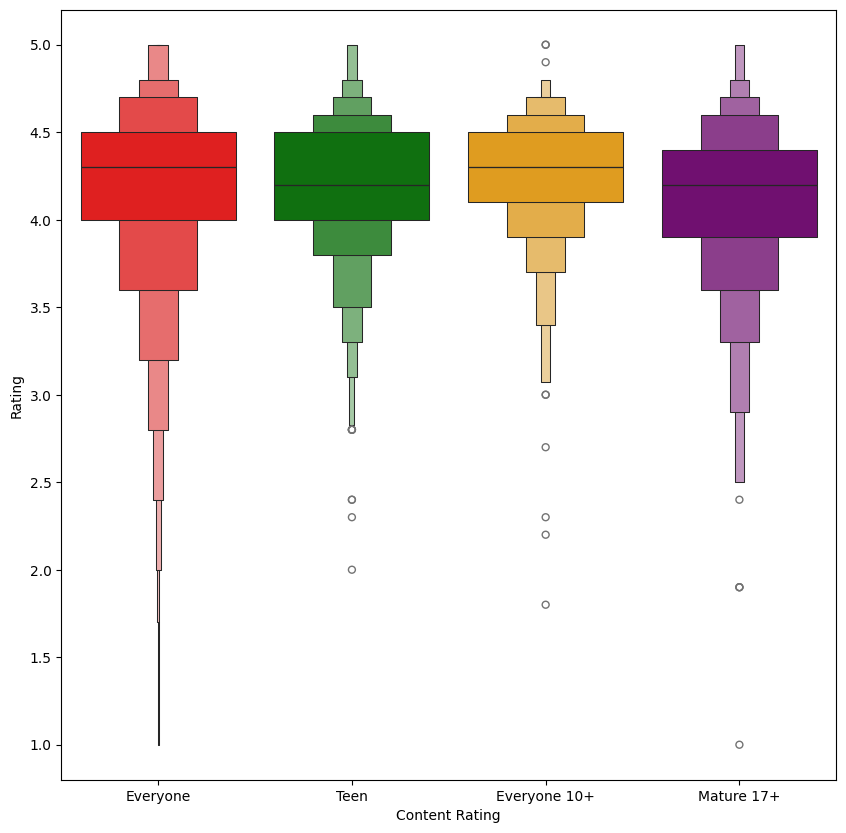

In [226]:
plt.figure(figsize=[10,10])
sns.boxenplot(x=data['Content Rating'], y=data['Rating'], palette =['red', 'green', 'orange','purple'])
plt.show()

<Axes: xlabel='Rating'>

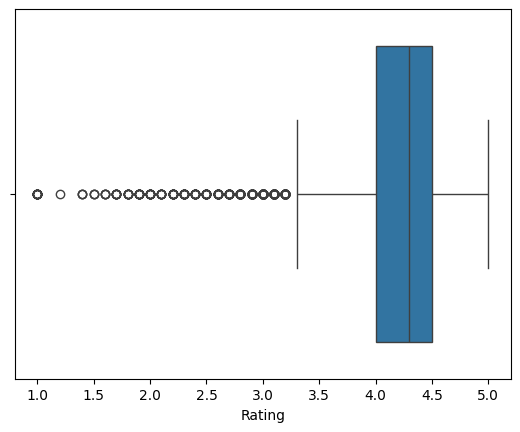

In [227]:
sns.boxplot(x=data['Rating'])

In [239]:
data['Genres'].value_counts() 

data.groupby('Genres')['Rating'].mean()

Genres
Action                                   4.240293
Action;Action & Adventure                4.311765
Adventure                                4.173134
Adventure;Action & Adventure             4.250000
Adventure;Brain Games                    4.600000
                                           ...   
Video Players & Editors                  4.029371
Video Players & Editors;Creativity       4.100000
Video Players & Editors;Music & Video    4.000000
Weather                                  4.228986
Word                                     4.423077
Name: Rating, Length: 115, dtype: float64

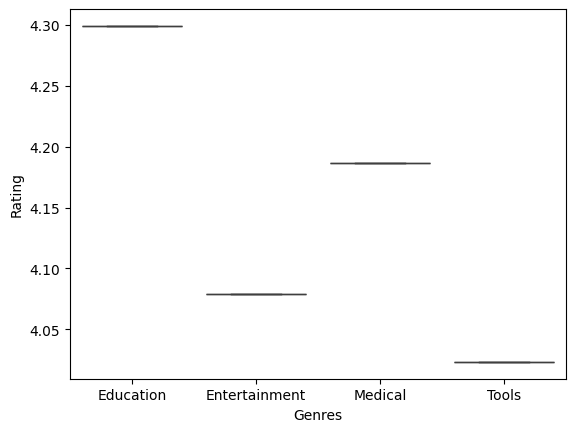

In [261]:
agh = []

for index, row in data.iterrows():
    if row['Genres'] == 'Tools' or row['Genres'] == 'Entertainment' or row['Genres']== 'Education' or row['Genres'] == 'Medical':
        agh.append({'Genres':row["Genres"], 'Rating':row['Rating']})
c = pd.DataFrame(agh)
d=c.groupby('Genres')[['Rating']].mean()
d = d.reset_index()
sns.boxplot(x=d['Genres'], y=d['Rating'])
plt.show()


In [263]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [265]:
data['month'] = data['Last Updated'].dt.month

In [266]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,6


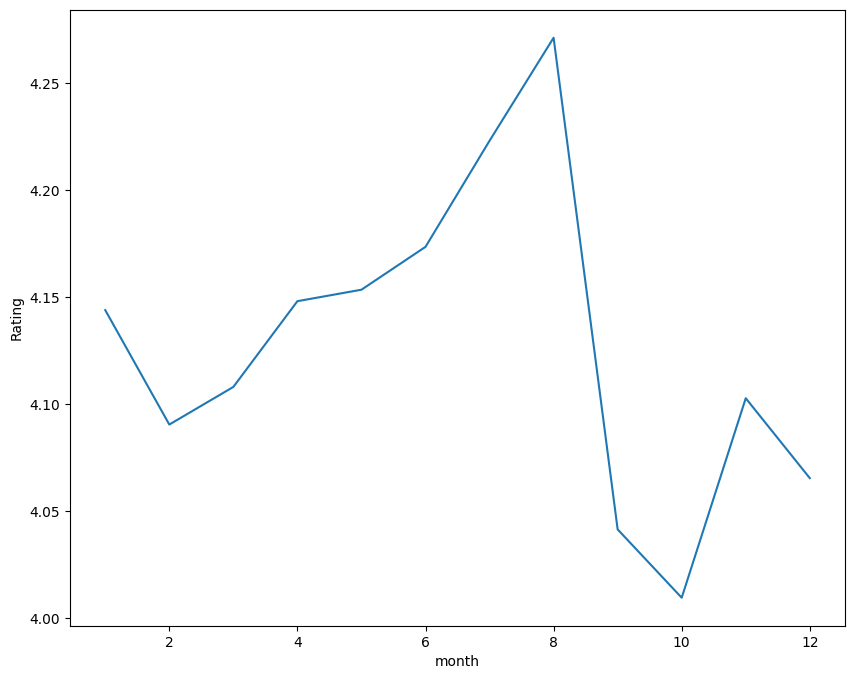

In [410]:
res = data.groupby('month')['Rating'].mean()
res = res.reset_index()
res
plt.figure(figsize=[10,8])
sns.lineplot(x=res['month'], y=res['Rating'])
res32 = data.groupby('month')['Price'].mean().reset_index()

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_73205/3226522352.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.pivot_table(index=['month'], values=['Installs'], columns = ['Content Rating'], aggfunc=sum).plot(kind='bar', stacked='True')


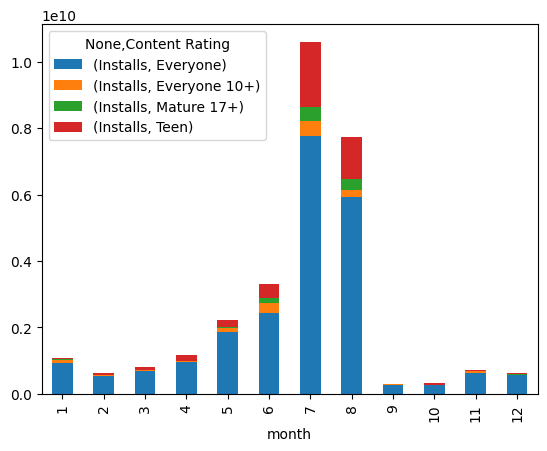

In [288]:
data.pivot_table(index=['month'], values=['Installs'], columns = ['Content Rating'], aggfunc=sum).plot(kind='bar', stacked='True')
plt.show()

In [294]:
data['year'] = data['Last Updated'].dt.year
data.groupby(['year'])['Installs'].mean().reset_index()

,year,Installs
0,2010,1.000000e+05
1,2011,1.160473e+06
2,2012,6.970025e+05
3,2013,1.001894e+06
4,2014,1.116448e+06
5,2015,8.145695e+05
6,2016,1.964857e+06
7,2017,1.370063e+06
8,2018,4.401935e+06


In [300]:
data['Total Installs'] = data['Installs'].cumsum()
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month,year,Total Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,2018,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1,2018,510000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8,2018,5510000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,6,2018,55510000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,6,2018,55610000.0


<Axes: xlabel='year'>

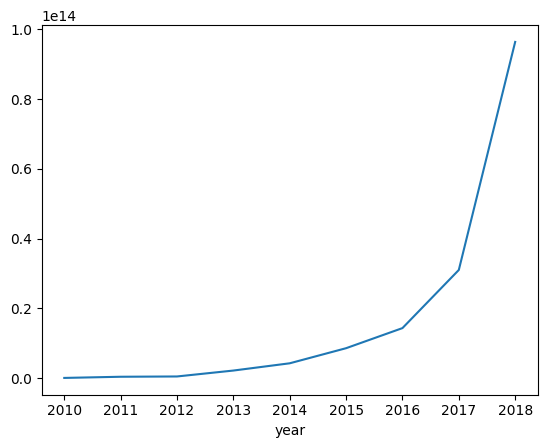

In [309]:
data.groupby('year')['Total Installs'].sum().plot()


In [346]:
dat1.head()

,year,Content Rating,Rating,Installs
0,2010,Everyone,4.200000,1.000000e+05
1,2011,Everyone,3.953846,5.697769e+05
2,2011,Everyone 10+,3.700000,5.000000e+06
3,2011,Teen,4.400000,5.000000e+06
4,2012,Everyone,3.747368,7.284237e+05


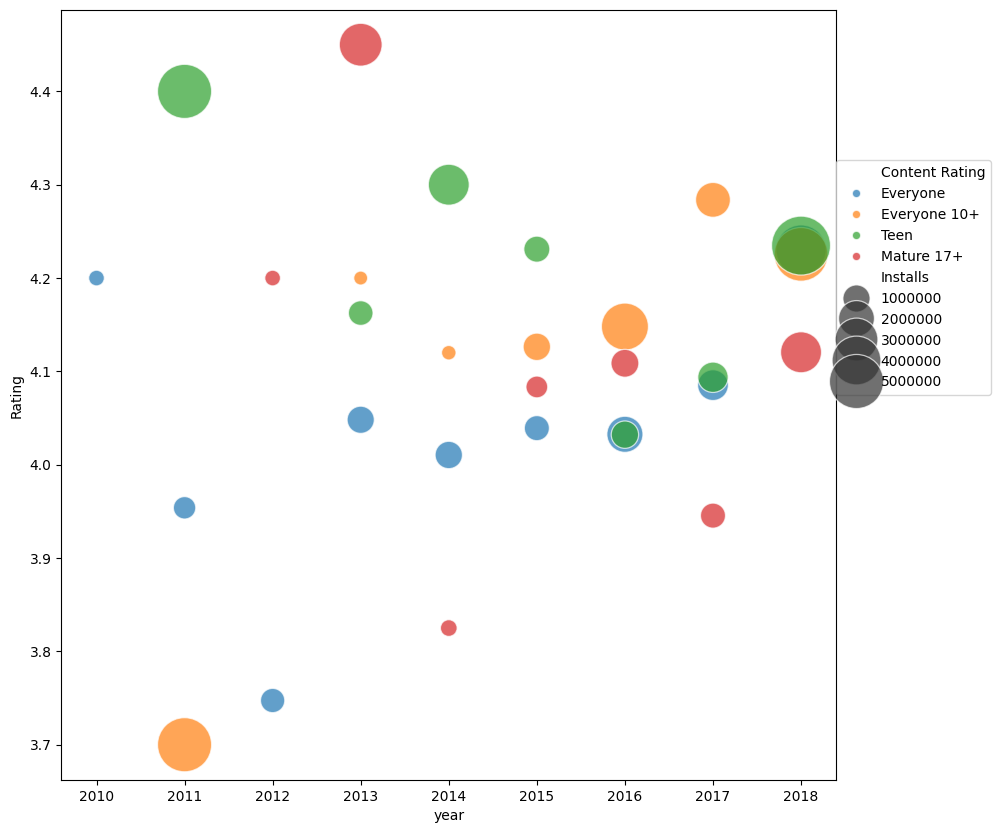

In [374]:
plt.figure(figsize=[10,10])
sns.scatterplot(
    data=dat1,
    x='year',
    y='Rating',
    hue='Content Rating',
    size='Installs',
    sizes=(100,900),
    alpha=0.7
)
plt.legend(loc=[1,0.5])

In [398]:
import plotly.express as px

In [405]:
fig = px.scatter(data, x="year",y="Installs",title="Montly average rating")
fig.show()